In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
train_data = pd.read_csv(r'C:\Users\vinpi\MIDS\w207_final_project_bwp\vish\train.csv')

In [4]:
train_data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [6]:
train_data.describe()
train_pt = train_data.pivot_table(train_data.columns,
               ['Cover_Type'], aggfunc='mean')
train_pt

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Id,Slope,...,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Vertical_Distance_To_Hydrology,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,159.463426,3128.025926,144.065741,211.690278,223.248611,1994.412963,271.507407,2579.715741,7996.077778,13.112963,...,0.000000,0.000000,0,0.000000,0.000463,41.281481,0.491667,0.083796,0.424537,0.000000
2,151.097222,2922.540278,142.950926,214.044444,225.369907,2155.277315,287.728704,2425.791667,6312.696759,13.423611,...,0.000000,0.003241,0,0.000463,0.004167,47.337963,0.525000,0.030556,0.435185,0.009259
3,173.672685,2398.423148,141.549537,201.655556,216.561111,916.909722,210.723148,969.595833,8127.537500,20.628704,...,0.025463,0.114815,0,0.000000,0.000000,64.081944,0.000000,0.000000,0.399537,0.600463
4,138.099537,2223.420370,111.808796,227.968056,216.889815,860.540741,104.537500,915.100463,6354.585648,18.468519,...,0.018056,0.112963,0,0.000000,0.000000,40.143519,0.000000,0.000000,0.000000,1.000000
5,137.992130,2786.801389,121.392593,223.368981,218.317130,1530.388889,208.873148,1329.318519,6486.800463,16.724537,...,0.000000,0.000000,0,0.000000,0.000000,50.871296,0.396296,0.000000,0.603704,0.000000
6,180.617130,2423.276852,147.682407,193.562963,209.960648,1057.654167,160.095370,1064.980556,8061.305093,18.986111,...,0.032870,0.069907,0,0.000000,0.000000,44.873611,0.000000,0.000000,0.445370,0.554630
7,155.794444,3362.769907,136.193981,216.639815,222.412037,2062.847222,346.904630,2713.659722,9584.496759,14.166667,...,0.000000,0.000000,0,0.000000,0.000000,68.945833,0.252315,0.116667,0.631019,0.000000


C:\Users\vinpi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


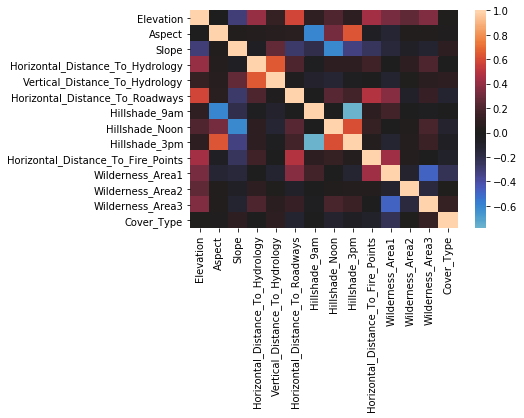

In [5]:
small_train = train_data.iloc[:,1:14]
small_train['Cover_Type'] = train_data['Cover_Type']
sns.heatmap(small_train.corr(), center=0)

In [8]:
#multicolinearity
corr_matrix = train_data.corr().abs()
high_corr_var=np.where(corr_matrix>0.5)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var



[('Elevation', 'Horizontal_Distance_To_Roadways'),
 ('Elevation', 'Wilderness_Area4'),
 ('Aspect', 'Hillshade_9am'),
 ('Aspect', 'Hillshade_3pm'),
 ('Slope', 'Hillshade_Noon'),
 ('Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'),
 ('Hillshade_9am', 'Hillshade_3pm'),
 ('Hillshade_Noon', 'Hillshade_3pm'),
 ('Wilderness_Area1', 'Soil_Type29'),
 ('Wilderness_Area3', 'Wilderness_Area4')]

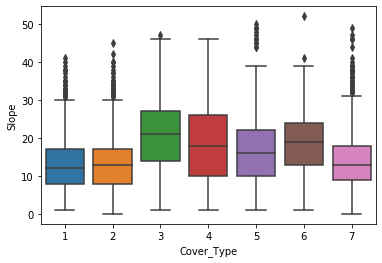

In [12]:
# for i in train_data.columns:
#     if i != 'Cover_Type':
#         plt.figure()
#         sns.boxplot(x=train_data['Cover_Type'], y=train_data[i])

sns.boxplot(x=train_data['Cover_Type'], y=train_data['Slope'])

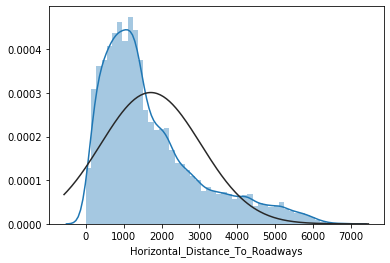

In [7]:
from scipy.stats import norm
sns.distplot(train_data['Horizontal_Distance_To_Roadways'], fit=norm)

In [ ]:
train_data['Horizontal_Distance_To_Roadways']

In [ ]:
train_data['Soil_Types'] = train_data['Soil_Type1']
for i in range(2,40):
    l = 'Soil_Type' + str(i)
    train_data['Soil_Types'] = train_data['Soil_Types'] + train_data[l]
    

In [ ]:
mn = train_data.groupby('Cover_Type').agg('sum')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(mn)

In [ ]:
train_pt

In [ ]:
small_train_pt = train_data.iloc[:,1:14]
small_train['Cover_Type'] = train_data['Cover_Type']
sns.heatmap(small_train.corr(), center=0)

In [140]:
# building base model and outlier treatment/preprocessing
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import random
from scipy import stats
from sklearn import preprocessing

feature_cols = np.array(train_data.columns)[:-1]
train_o = train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]
X_o = train_data[feature_cols]
X_o = preprocessing.scale(X_o)
y_o = train_data['Cover_Type']
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.3, random_state=0)

In [142]:
# DT max depth tuning

acc = []
for i in range(3,20):
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
print("The optimal depth is " + str(acc.index(max(acc))) + ", which gives an accuracy of " + str(acc[acc.index(max(acc))]))

The optimal depth is 14, which gives an accuracy of 0.7806437389770723


In [139]:
# RF with 1000 DT

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(np.array(X_train_o), np.array(y_train_o));
predictions = rf.predict(np.array(X_test_o))
metrics.accuracy_score(y_test_o, predictions)

0.8657407407407407